## Cars 4 U Project - Kerri Anderson
AI ML May 2021

> Use information available for used cars to predict the price to compare to market value.
> Use the model, within its capabilities, to predict price to identify opportunities to sell used cars for the optimized profit.

In [1]:
#import packages needed
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

#import packages needed for linear regresssion and data processing
from sklearn.model_selection import train_test_split # Sklearn package's randomized data splitting function

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scaler = StandardScaler()

from sklearn.impute import SimpleImputer

## READ IN DATA - INITIAL OBSERVATIONS

In [2]:
#read in the dataset
cfu = pd.read_csv("used_cars_data.csv", engine="python")

# checking the shape of the data
print(f"There are {cfu.shape[0]} rows and {cfu.shape[1]} columns.")  # f-string

There are 7253 rows and 14 columns.


In [3]:
#look at 10 rows of random sample of the dataset
#set the seed so the results are reproducible
np.random.seed(1)  # To get the same random results every time
cfu.sample(10)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47 Lakh,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44 Lakh,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,NaN,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,NaN,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05 Lakh,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,NaN,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,NaN,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,NaN,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36 Lakh,8.20


In [4]:
#general information about the datset
#number of nulls and variable types
cfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
#look at distribtuion of numeric variables in dataset, transform output for easier readability 
cfu.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.0,3626.00,5439.00,7252.0
Year,7253.0,2013.365366,3.254421,1996.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.0,53416.00,73000.00,6500000.0
Seats,7200.0,5.279722,0.811660,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


## Initial observations of the data

Initial looks at the data show the following pre-processing will need to occur: 

0. The serial number  won't be used for modeling, as it should be a unique identierifer and won't provide any predictive power
1. Name could be used to extract the make of the vehicle
2. Need to see how many values of "location" there are, depending on the number this could be dropped or, if kept in the model, would need to be turned into a dummy variable for modeling
3. Can look at the distributions of the numeric values (year, KM driven, seats, price) and can transform to provide a more normal distribution if neded
4. Some values will need to be converted from object to a dummy value (fuel type, transmission, owner type)
5. Some values will need to be converted from object to numeric (mileage, engine, power) by separating the numeric and character portions of the strings
6. Question: should seats be a float or integer? Does python respond to these differently in the model? I will need to test this out
7. Several variables have missing values (mileage, engine, seats, new_price, price) - will need to evaluate the best way to handle these
8. Most likely will drop new-price as there are too many missing values
9. Question: how many records have no missing values? excluding new_price? Need to consider the implications of dropping all rows with any missing value, vs using the average to fill in missing values in some cases
10. Price is the target variable, so it must be present, will remove any records that are missing value for price (not appropriate to impute this value for a regression, as if the values are missing-not-at-random this can greatly impact our estimate)



In [6]:
#how many values have nulls for each variable
cfu.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [7]:
#make a copy of the datset to make modifications for modeling
cfu2=cfu.copy()

In [8]:
#drop serial number, new_price as these won't be used in model
cfu2.drop(['S.No.',"New_Price"], axis=1, inplace=True)

In [9]:
#price is the target varaible and must be present to be included in dataset
#drop any row (observation) that's missing price
cfu2.dropna(subset=['Price'],inplace=True)

In [10]:
#verify columns in datset
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 611.3+ KB


# VEHICLE MAKE

In [11]:
#extract vehicle make name
#source https://stackoverflow.com/questions/37504672/pandas-dataframe-return-first-word-in-string-for-column
cfu2['Vehicle_make']= cfu2['Name'].str.split(' ').str[0]

In [12]:
cfu2.sample(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Vehicle_make
1058,Maruti Wagon R VXI,Delhi,2016,22000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,3.70,Maruti
1502,Mercedes-Benz New C-Class C 200 CGI Avantgarde,Mumbai,2011,40000,Petrol,Automatic,Second,11.74 kmpl,1796 CC,186 bhp,5.0,14.50,Mercedes-Benz
3343,Toyota Fortuner 4x4 AT,Coimbatore,2017,68319,Diesel,Automatic,First,12.55 kmpl,2982 CC,168.5 bhp,7.0,25.12,Toyota
5102,Maruti Wagon R VXI,Kochi,2019,31817,Petrol,Manual,First,22.5 kmpl,998 CC,67.04 bhp,5.0,5.34,Maruti
3156,Hyundai Grand i10 1.2 Kappa Magna AT,Coimbatore,2019,12153,Petrol,Automatic,First,18.9 kmpl,1197 CC,81.86 bhp,5.0,6.84,Hyundai
654,Maruti Alto K10 VXI,Bangalore,2011,64357,Petrol,Manual,First,24.07 kmpl,998 CC,67.1 bhp,5.0,2.75,Maruti
2059,Maruti Wagon R CNG LXI,Mumbai,2013,54000,CNG,Manual,First,33.54 km/kg,998 CC,67.04 bhp,5.0,3.05,Maruti
5924,Mahindra Scorpio 1.99 S4 Plus,Kochi,2017,26741,Diesel,Manual,First,15.4 kmpl,1997 CC,120 bhp,7.0,10.08,Mahindra
692,Hyundai i10 Sportz,Mumbai,2011,35000,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.75,Hyundai
4176,Hyundai i10 Magna 1.1,Ahmedabad,2013,49000,Petrol,Manual,First,19.81 kmpl,1086 CC,68.05 bhp,5.0,3.20,Hyundai


In [13]:
cfu2["Vehicle_make"].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Lamborghini         1
Isuzu               1
Bentley             1
Ambassador          1
Name: Vehicle_make, dtype: int64

In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / total  # width of the plot
        y = p.get_y() + p.get_height() + 1.5  # height of the plot

        ax.annotate(label, (x, y), size=12, rotation=0)  # annotate the percentage

    plt.show()  # show the plot

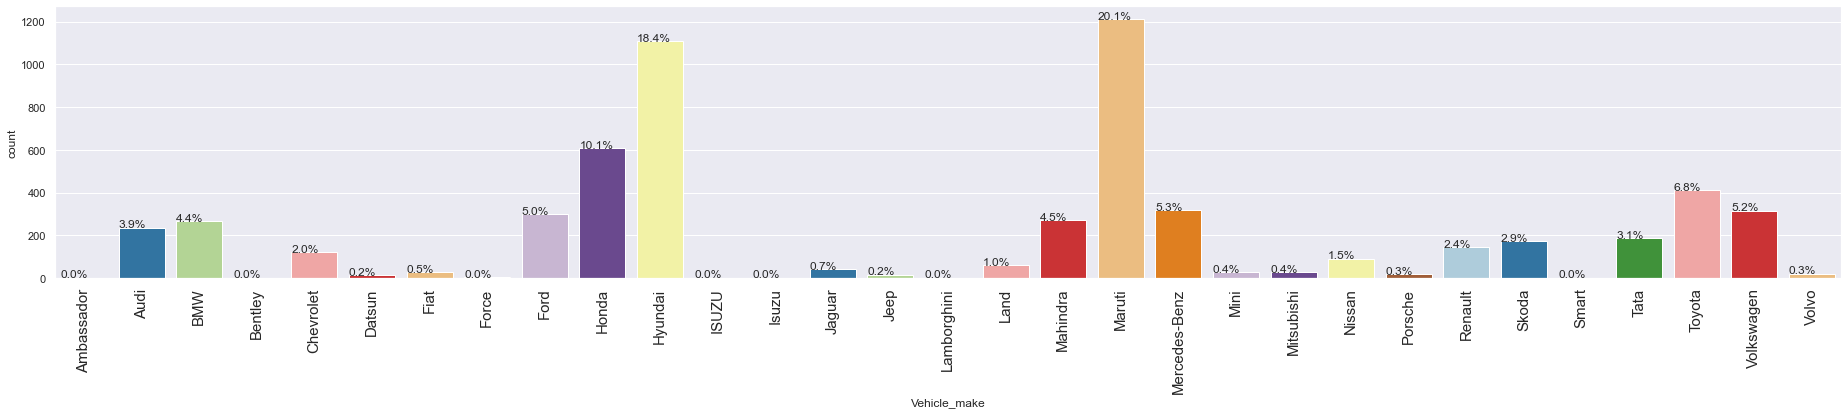

In [15]:
labeled_barplot(cfu2, 'Vehicle_make', perc=True)

<AxesSubplot:xlabel='Vehicle_make', ylabel='Price'>

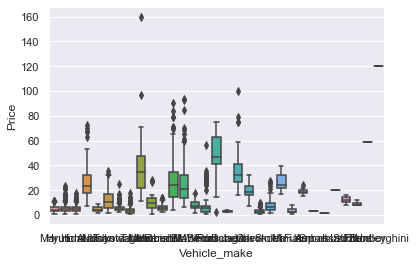

In [16]:
sns.boxplot(x="Vehicle_make", y="Price", data=cfu2)

In [17]:
#create dummy variables for vehicle make with Maruti  as reference level as it is most popular make
cfu2=pd.get_dummies(cfu2,prefix="Make",prefix_sep='_',drop_first=False,columns=[("Vehicle_make")])

cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 43 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                6019 non-null   object 
 1   Location            6019 non-null   object 
 2   Year                6019 non-null   int64  
 3   Kilometers_Driven   6019 non-null   int64  
 4   Fuel_Type           6019 non-null   object 
 5   Transmission        6019 non-null   object 
 6   Owner_Type          6019 non-null   object 
 7   Mileage             6017 non-null   object 
 8   Engine              5983 non-null   object 
 9   Power               5983 non-null   object 
 10  Seats               5977 non-null   float64
 11  Price               6019 non-null   float64
 12  Make_Ambassador     6019 non-null   uint8  
 13  Make_Audi           6019 non-null   uint8  
 14  Make_BMW            6019 non-null   uint8  
 15  Make_Bentley        6019 non-null   uint8  
 16  Make_C

In [18]:
#drop name
cfu2.drop(["Name","Make_Maruti"], axis=1, inplace=True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 41 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Location            6019 non-null   object 
 1   Year                6019 non-null   int64  
 2   Kilometers_Driven   6019 non-null   int64  
 3   Fuel_Type           6019 non-null   object 
 4   Transmission        6019 non-null   object 
 5   Owner_Type          6019 non-null   object 
 6   Mileage             6017 non-null   object 
 7   Engine              5983 non-null   object 
 8   Power               5983 non-null   object 
 9   Seats               5977 non-null   float64
 10  Price               6019 non-null   float64
 11  Make_Ambassador     6019 non-null   uint8  
 12  Make_Audi           6019 non-null   uint8  
 13  Make_BMW            6019 non-null   uint8  
 14  Make_Bentley        6019 non-null   uint8  
 15  Make_Chevrolet      6019 non-null   uint8  
 16  Make_D

## LOCATION

In [19]:
#how many unique values of location are in the dataset - should we keep this as a predictor
cfu2.value_counts("Location")

Location
Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
dtype: int64

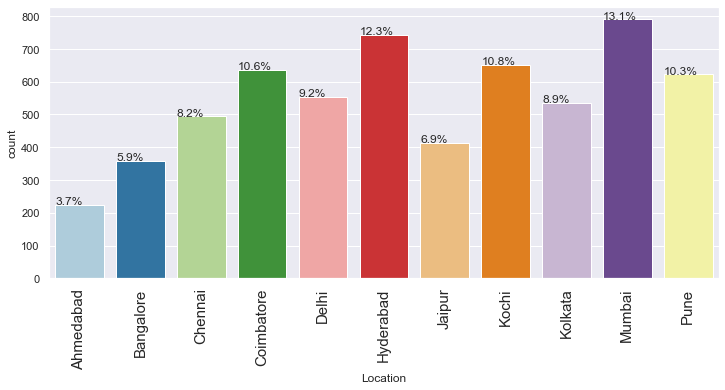

In [20]:
labeled_barplot(cfu2, 'Location', perc=True)

<AxesSubplot:xlabel='Location', ylabel='Price'>

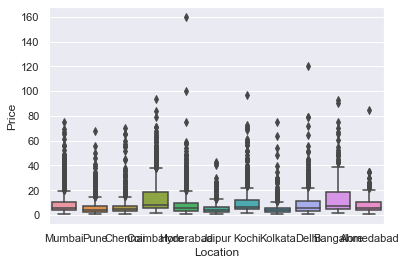

In [21]:
sns.boxplot(x="Location", y="Price", data=cfu2)

## Observations on location variable
There is a good distribution of the number of records with each location, not too many unique values, and a fairly evenly distributed number of records for each location, so we should keep this in the model and turn it into a dummy variable

In [22]:
#dummy variables for location
#set the reference level as Mumbai as it has the most records
cfu2['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [23]:
loc_dummy=pd.get_dummies(pd.Categorical(cfu['Location'], categories=cfu['Location'].unique(), ordered=True), prefix="Location",prefix_sep='_', drop_first=True)
loc_dummy.head()

,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,Location_Ahmedabad
0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [24]:
#merge dummy variables onto dataframe
cfu2=cfu2.merge(loc_dummy,left_index=True,right_index=True)
#check sample to see if it merged correctly
cfu2.sample(20)


,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,Location_Ahmedabad
672,Hyderabad,2012,62000,Diesel,Manual,First,22.07 kmpl,1199 CC,73.9 bhp,5.0,4.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1476,Hyderabad,2013,51000,Diesel,Automatic,First,23.8 kmpl,1998 CC,112 bhp,5.0,21.94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3766,Mumbai,2017,15000,Petrol,Manual,First,18.88 kmpl,999 CC,123.24 bhp,5.0,8.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3586,Delhi,2013,52000,CNG,Manual,Second,15.1 km/kg,1196 CC,73 bhp,5.0,2.60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3595,Hyderabad,2007,65047,LPG,Manual,First,17.3 km/kg,1061 CC,57.5 bhp,5.0,1.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
662,Mumbai,2013,36000,Petrol,Automatic,First,14.8 kmpl,1598 CC,105 bhp,5.0,4.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4996,Delhi,2009,71499,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,3.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5540,Coimbatore,2016,37023,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,13.39,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5290,Hyderabad,2016,29647,Diesel,Manual,First,20.14 kmpl,1498 CC,88 bhp,5.0,6.30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3730,Bangalore,2015,58970,Diesel,Automatic,First,17.11 kmpl,1968 CC,174.33 bhp,5.0,23.75,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
#drop the location variable, keep the dummy variables for location
cfu2.drop(["Location"], axis=1, inplace=True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 6019 non-null   int64  
 1   Kilometers_Driven    6019 non-null   int64  
 2   Fuel_Type            6019 non-null   object 
 3   Transmission         6019 non-null   object 
 4   Owner_Type           6019 non-null   object 
 5   Mileage              6017 non-null   object 
 6   Engine               5983 non-null   object 
 7   Power                5983 non-null   object 
 8   Seats                5977 non-null   float64
 9   Price                6019 non-null   float64
 10  Make_Ambassador      6019 non-null   uint8  
 11  Make_Audi            6019 non-null   uint8  
 12  Make_BMW             6019 non-null   uint8  
 13  Make_Bentley         6019 non-null   uint8  
 14  Make_Chevrolet       6019 non-null   uint8  
 15  Make_Datsun          6019 non-null   u

## YEAR

<AxesSubplot:xlabel='Year', ylabel='Count'>

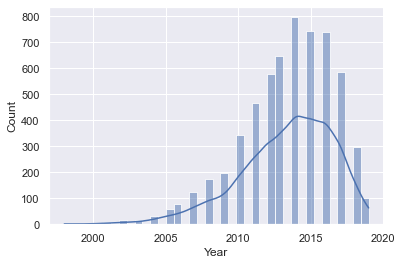

In [26]:
#look at year distribution
sns.histplot(cfu2["Year"],kde=True)

In [27]:
#look at distribution of log transoformation of Year variable
cfu2['Year_log']=np.log(cfu2['Year'])

<AxesSubplot:xlabel='Year_log', ylabel='Count'>

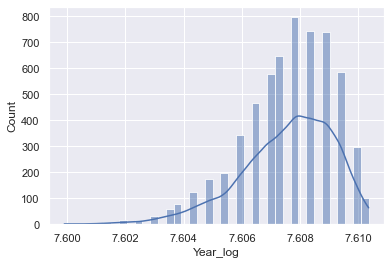

In [28]:
sns.histplot(cfu2["Year_log"],kde=True)

In [29]:
#normalize with z transformation
cfu2['Year_z_std'] = std_scaler.fit_transform(cfu2[['Year']])

<AxesSubplot:xlabel='Year_z_std', ylabel='Count'>

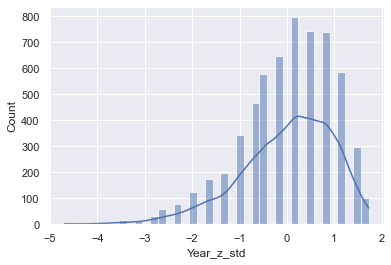

In [30]:
sns.histplot(cfu2["Year_z_std"],kde=True)

In [31]:
cfu2["Year"].value_counts(ascending=True)

1999      2
2000      4
1998      4
2001      8
2002     15
2003     17
2004     31
2005     57
2006     78
2019    102
2007    125
2008    174
2009    198
2018    298
2010    342
2011    466
2012    580
2017    587
2013    649
2016    741
2015    744
2014    797
Name: Year, dtype: int64

## Observations for year variable
Year variable is left skewed. There are very few cars in the dataset with a manufactured year earlier than 2006.
The log transformation didn't improve the skew.
The standard scaler didn't improve the skew.
I will group the cars manufactured 2005 or earlier. It should be known that this is a limitation of the model. It cannot be used reliably for cars manufactured prior to 2006. In order to make the intercept interpretable, scale the year by 2014.

In [32]:
cfu2["Year_group"] = np.where(cfu2['Year'] <=2005, 2005,cfu2['Year'])
cfu2.sample(10)

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,Location_Ahmedabad,Year_log,Year_z_std,Year_group
440,2017,31841,CNG,Manual,First,15.1 km/kg,1196 CC,73 bhp,5.0,4.70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7.609367,1.113881,2017
1188,2013,87000,Diesel,Automatic,First,22.0 kmpl,1582 CC,126.2 bhp,5.0,5.90,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7.607381,-0.109559,2013
956,2012,71000,Diesel,Manual,First,23.0 kmpl,1396 CC,90 bhp,5.0,3.70,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7.606885,-0.415419,2012
5948,2007,91000,Diesel,Automatic,Second,15.6 kmpl,1896 CC,106 bhp,5.0,2.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7.604396,-1.944718,2007
4967,2012,25000,Petrol,Manual,First,18.4 kmpl,1198 CC,86.8 bhp,5.0,2.75,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7.606885,-0.415419,2012
477,2018,3678,Petrol,Manual,First,18.16 kmpl,1196 CC,86.8 bhp,5.0,6.80,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,7.609862,1.419741,2018
4968,2018,2000,Petrol,Automatic,First,23.84 kmpl,1199 CC,83.83 bhp,5.0,5.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,7.609862,1.419741,2018
2348,2015,36096,Diesel,Manual,First,15.1 kmpl,2179 CC,140 bhp,7.0,8.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7.608374,0.502161,2015
693,2016,22732,Petrol,Automatic,First,18.1 kmpl,3498 CC,306 bhp,2.0,55.54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7.608871,0.808021,2016
2846,2011,73783,Petrol,Automatic,Second,13.7 kmpl,1798 CC,157.75 bhp,5.0,5.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,7.606387,-0.721279,2011


In [33]:
cfu2["Year_group"].value_counts(ascending=True)

2006     78
2019    102
2007    125
2005    138
2008    174
2009    198
2018    298
2010    342
2011    466
2012    580
2017    587
2013    649
2016    741
2015    744
2014    797
Name: Year_group, dtype: int64

In [34]:
cfu2['Year_group'] = cfu2['Year_group'].map(lambda a: a - 2015)

<AxesSubplot:xlabel='Year_group', ylabel='Count'>

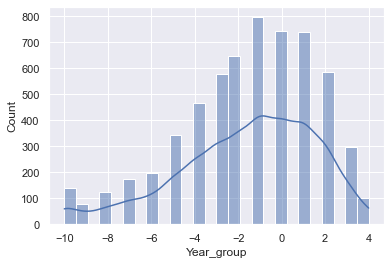

In [35]:
sns.histplot(cfu2["Year_group"],kde=True)

In [36]:
#keep year drop transformations
cfu2.drop(["Year","Year_z_std","Year_log"], axis=1, inplace=True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Kilometers_Driven    6019 non-null   int64  
 1   Fuel_Type            6019 non-null   object 
 2   Transmission         6019 non-null   object 
 3   Owner_Type           6019 non-null   object 
 4   Mileage              6017 non-null   object 
 5   Engine               5983 non-null   object 
 6   Power                5983 non-null   object 
 7   Seats                5977 non-null   float64
 8   Price                6019 non-null   float64
 9   Make_Ambassador      6019 non-null   uint8  
 10  Make_Audi            6019 non-null   uint8  
 11  Make_BMW             6019 non-null   uint8  
 12  Make_Bentley         6019 non-null   uint8  
 13  Make_Chevrolet       6019 non-null   uint8  
 14  Make_Datsun          6019 non-null   uint8  
 15  Make_Fiat            6019 non-null   u

# KM DRIVEN

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Count'>

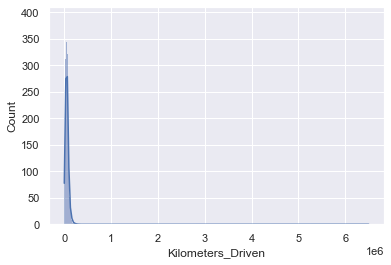

In [37]:
#look at KM driven distribution
sns.histplot(cfu2["Kilometers_Driven"],kde=True)

<AxesSubplot:xlabel='Kilometers_Driven_log', ylabel='Count'>

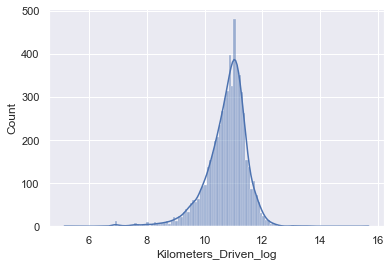

In [38]:
#look at distribution of log transoformation of Year variable
cfu2['Kilometers_Driven_log']=np.log(cfu2['Kilometers_Driven'])
sns.histplot(cfu2["Kilometers_Driven_log"],kde=True)

## Observations on kilometers driven
KM driven was highly skewed to the right. The log transformation was successful at normalizing the distribution.

In [39]:
#keep the log transformation of KM driven
cfu2.drop(["Kilometers_Driven"], axis=1, inplace=True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Fuel_Type              6019 non-null   object 
 1   Transmission           6019 non-null   object 
 2   Owner_Type             6019 non-null   object 
 3   Mileage                6017 non-null   object 
 4   Engine                 5983 non-null   object 
 5   Power                  5983 non-null   object 
 6   Seats                  5977 non-null   float64
 7   Price                  6019 non-null   float64
 8   Make_Ambassador        6019 non-null   uint8  
 9   Make_Audi              6019 non-null   uint8  
 10  Make_BMW               6019 non-null   uint8  
 11  Make_Bentley           6019 non-null   uint8  
 12  Make_Chevrolet         6019 non-null   uint8  
 13  Make_Datsun            6019 non-null   uint8  
 14  Make_Fiat              6019 non-null   uint8  
 15  Make

# FUEL TYPE

In [40]:
cfu2.value_counts('Fuel_Type')

Fuel_Type
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
dtype: int64

## Observations on fuel type
Diesel and petrol are very popular fuel types
When creating dummy variables for this, need to ensure that either diesel or petrol is the reference level

In [41]:
#get dummy variables for fuel type
#want diesel to be the reference level so don't drop first
#manually drop diesel so it is reference
cfu2=pd.get_dummies(cfu2,prefix="Fuel_Type",prefix_sep='_',drop_first=False,columns=[("Fuel_Type")])
cfu2.drop(["Fuel_Type_Diesel"], axis=1, inplace=True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Transmission           6019 non-null   object 
 1   Owner_Type             6019 non-null   object 
 2   Mileage                6017 non-null   object 
 3   Engine                 5983 non-null   object 
 4   Power                  5983 non-null   object 
 5   Seats                  5977 non-null   float64
 6   Price                  6019 non-null   float64
 7   Make_Ambassador        6019 non-null   uint8  
 8   Make_Audi              6019 non-null   uint8  
 9   Make_BMW               6019 non-null   uint8  
 10  Make_Bentley           6019 non-null   uint8  
 11  Make_Chevrolet         6019 non-null   uint8  
 12  Make_Datsun            6019 non-null   uint8  
 13  Make_Fiat              6019 non-null   uint8  
 14  Make_Force             6019 non-null   uint8  
 15  Make

# TRANSMISSION 

In [42]:
cfu2.value_counts('Transmission')

Transmission
Manual       4299
Automatic    1720
dtype: int64

## Observations on transmission type
Only two values, manual is most prevalent and should be reference group

In [43]:
#get dummy variables for transmission type
#want manual to be the reference level so don't drop first
#drop manual so it is reference
cfu2=pd.get_dummies(cfu2,prefix="Transmission",prefix_sep='_',drop_first=False,columns=[("Transmission")])
cfu2.drop(["Transmission_Manual"], axis=1, inplace=True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Owner_Type              6019 non-null   object 
 1   Mileage                 6017 non-null   object 
 2   Engine                  5983 non-null   object 
 3   Power                   5983 non-null   object 
 4   Seats                   5977 non-null   float64
 5   Price                   6019 non-null   float64
 6   Make_Ambassador         6019 non-null   uint8  
 7   Make_Audi               6019 non-null   uint8  
 8   Make_BMW                6019 non-null   uint8  
 9   Make_Bentley            6019 non-null   uint8  
 10  Make_Chevrolet          6019 non-null   uint8  
 11  Make_Datsun             6019 non-null   uint8  
 12  Make_Fiat               6019 non-null   uint8  
 13  Make_Force              6019 non-null   uint8  
 14  Make_Ford               6019 non-null   

# OWNER TYPE

In [44]:
cfu2.value_counts('Owner_Type')

Owner_Type
First             4929
Second             968
Third              113
Fourth & Above       9
dtype: int64

## Observations on owner type
Will convert this into a numeric variable with values of 1, 2, 3. The 4+ category doesn't have enough observations to provide an accurate prediction, so we should group them in with the 3 to create a 3+.

In [45]:
#source https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/

#convert owner type to owner count variable

# create a list of our conditions
conditions = [
    (cfu2['Owner_Type'] =='First'),
    (cfu2['Owner_Type'] =='Second'),
    (cfu2['Owner_Type'] =='Third'),
    (cfu2['Owner_Type'] =='Fourth & Above')
    ]

# create a list of the values we want to assign for each condition
values = [1,2,3,3]

# create a new column and use np.select to assign values to it using our lists as arguments
cfu2['Owner_Type_Num'] = np.select(conditions, values)

# display updated DataFrame
cfu2.sample(20)

,Owner_Type,Mileage,Engine,Power,Seats,Price,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,Location_Ahmedabad,Year_group,Kilometers_Driven_log,Fuel_Type_CNG,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Owner_Type_Num
1001,First,25.17 kmpl,799 CC,53.3 bhp,5.0,4.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3,7.549609,0,0,0,1,0,1
3040,First,28.4 kmpl,1248 CC,74 bhp,5.0,5.36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10.887437,0,0,0,0,0,1
392,First,13.5 kmpl,2987 CC,282 bhp,5.0,62.81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,10.941128,0,0,0,0,1,1
2941,First,13.45 km/kg,1086 CC,62.1 bhp,5.0,3.20,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1,10.933107,0,0,1,0,0,1
1138,First,14.69 kmpl,2993 CC,258 bhp,5.0,44.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,9.735069,0,0,0,0,1,1
4637,First,25.17 kmpl,799 CC,53.3 bhp,5.0,3.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,10.126631,0,0,0,1,0,1
1061,First,16.0 kmpl,1997 CC,140 bhp,7.0,12.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,9.500245,0,0,0,0,0,1
4544,First,21.1 kmpl,1197 CC,85.80 bhp,5.0,6.17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,10.597934,0,0,0,1,0,1
4718,First,13.5 kmpl,1799 CC,130 bhp,5.0,4.25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-6,11.156251,0,0,0,1,0,1
1768,First,20.3 kmpl,998 CC,68.05 bhp,5.0,2.75,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-1,9.185945,0,0,0,1,0,1


In [46]:
#verify that the coding works
cfu2.groupby(['Owner_Type']).Owner_Type_Num.value_counts()

Owner_Type      Owner_Type_Num
First           1                 4929
Fourth & Above  3                    9
Second          2                  968
Third           3                  113
Name: Owner_Type_Num, dtype: int64

In [47]:
cfu2.drop(["Owner_Type"], axis=1, inplace=True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mileage                 6017 non-null   object 
 1   Engine                  5983 non-null   object 
 2   Power                   5983 non-null   object 
 3   Seats                   5977 non-null   float64
 4   Price                   6019 non-null   float64
 5   Make_Ambassador         6019 non-null   uint8  
 6   Make_Audi               6019 non-null   uint8  
 7   Make_BMW                6019 non-null   uint8  
 8   Make_Bentley            6019 non-null   uint8  
 9   Make_Chevrolet          6019 non-null   uint8  
 10  Make_Datsun             6019 non-null   uint8  
 11  Make_Fiat               6019 non-null   uint8  
 12  Make_Force              6019 non-null   uint8  
 13  Make_Ford               6019 non-null   uint8  
 14  Make_Honda              6019 non-null   

# Power, Mileage, Engine

In [48]:
#need to understand the numeric and character portions of mileage, engine and power variables
#if all character variables are the same measurement, we can pull out numeric portion
#if there are different character variables, might need to research conversion rates
cfu2["Power_txt"]=cfu2.Power.str.extract('([A-Za-z]+)')
cfu2["Mileage_txt"]=cfu2.Mileage.str.extract('([A-Za-z]+)')
cfu2["Engine_txt"]=cfu2.Engine.str.extract('([A-Za-z]+)')

In [49]:
cfu2['Power_txt'].value_counts()

bhp     5876
null     107
Name: Power_txt, dtype: int64

In [50]:
cfu2['Mileage_txt'].value_counts()

kmpl    5951
km        66
Name: Mileage_txt, dtype: int64

In [51]:
cfu2['Engine_txt'].value_counts()

CC    5983
Name: Engine_txt, dtype: int64

In [52]:
#the information given, while not perfect, does not give me reason to believe that there are different units of measurement in these variables
#extract the number portion of the string for power, mileage and engine

#this code doesn't give decimal value
#cfu2["Power_num"]=cfu2.Power.str.extract('(\d+)')
#cfu2["Mileage_num"]=cfu2.Mileage.str.extract('(\d+)')
#cfu2["Engine_num"]=cfu2.Engine.str.extract('(\d+)')

#error
#cfu2['Power2'] = cfu2['Power'].map(lambda x: x.lstrip('+-').rstrip('aAbBcC'))
#cfu2.sample(20)

#this code doesn't give decimal value
#cfu2['Power2'] = cfu2['Power'].str.replace(r'\D', '')
#cfu2.sample(20)


cfu2['Engine_num'] = cfu2['Engine'].str.split(r'\D').str.get(0).astype('float')
cfu2.sample(20)

,Mileage,Engine,Power,Seats,Price,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,Location_Ahmedabad,Year_group,Kilometers_Driven_log,Fuel_Type_CNG,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Owner_Type_Num,Power_txt,Mileage_txt,Engine_txt,Engine_num
1556,12.8 kmpl,2494 CC,102 bhp,7.0,6.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,-3,11.127263,0,0,0,0,0,1,bhp,kmpl,CC,2494.0
2677,19.0 kmpl,998 CC,66.1 bhp,5.0,2.25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-6,11.034309,0,0,0,1,0,1,bhp,kmpl,CC,998.0
4748,23.84 kmpl,1199 CC,84 bhp,5.0,5.85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,4,9.723044,0,0,0,1,0,1,bhp,kmpl,CC,1199.0
2943,22.7 kmpl,1498 CC,89.84 bhp,5.0,5.45,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1,11.072776,0,0,0,0,0,1,bhp,kmpl,CC,1498.0
628,13.0 kmpl,2982 CC,168.5 bhp,7.0,20.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,-1,11.588265,0,0,0,0,0,1,bhp,kmpl,CC,2982.0
5230,23.0 kmpl,1498 CC,98.96 bhp,5.0,7.69,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,11.057582,0,0,0,0,0,1,bhp,kmpl,CC,1498.0
701,12.39 kmpl,2179 CC,147.51 bhp,5.0,16.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-4,11.599103,0,0,0,0,1,1,bhp,kmpl,CC,2179.0
5304,21.76 kmpl,1995 CC,190 bhp,5.0,35.00,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,9.952278,0,0,0,0,1,1,bhp,kmpl,CC,1995.0
4529,16.8 kmpl,1497 CC,118 bhp,5.0,5.15,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-1,10.947960,0,0,0,1,1,1,bhp,kmpl,CC,1497.0
158,19.4 kmpl,1198 CC,86.8 bhp,5.0,2.39,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,-2,10.412712,0,0,0,1,0,1,bhp,kmpl,CC,1198.0


In [53]:
def clean_mileage(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('km', '').replace('pl', '').replace('/kg', ''))
    return(x)

#source
#https://pbpython.com/currency-cleanup.html

In [54]:
cfu2['Mileage_num'] = cfu2['Mileage'].apply(clean_mileage).astype('float')
cfu2['Mileage_Type'] = cfu2['Mileage'].apply(lambda x: type(x).__name__)
cfu2.sample(20)

,Mileage,Engine,Power,Seats,Price,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,Location_Ahmedabad,Year_group,Kilometers_Driven_log,Fuel_Type_CNG,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Owner_Type_Num,Power_txt,Mileage_txt,Engine_txt,Engine_num,Mileage_num,Mileage_Type
5309,14.7 kmpl,1150 CC,76 bhp,5.0,1.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-6,11.225243,0,0,0,1,0,2,bhp,kmpl,CC,1150.0,14.70,str
5708,16.0 kmpl,1497 CC,117.3 bhp,7.0,9.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,9.711297,0,0,0,1,1,1,bhp,kmpl,CC,1497.0,16.00,str
5664,18.9 kmpl,998 CC,67.1 bhp,5.0,1.95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-7,11.004148,0,0,0,1,0,2,bhp,kmpl,CC,998.0,18.90,str
5849,25.83 kmpl,1498 CC,99 bhp,5.0,4.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,11.652687,0,0,0,0,0,1,bhp,kmpl,CC,1498.0,25.83,str
2394,17.0 kmpl,1497 CC,118 bhp,5.0,2.75,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-7,11.650511,0,0,0,1,0,2,bhp,kmpl,CC,1497.0,17.00,str
3327,22.7 kmpl,1498 CC,89.84 bhp,5.0,5.10,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-2,11.082143,0,0,0,0,0,1,bhp,kmpl,CC,1498.0,22.70,str
2011,25.17 kmpl,799 CC,53.3 bhp,5.0,2.99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,10.126631,0,0,0,1,0,1,bhp,kmpl,CC,799.0,25.17,str
4096,19.16 kmpl,2487 CC,175.67 bhp,5.0,26.11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2,10.054017,0,0,0,1,1,1,bhp,kmpl,CC,2487.0,19.16,str
1807,17.11 kmpl,1968 CC,174.33 bhp,5.0,24.50,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1,9.952278,0,0,0,0,1,1,bhp,kmpl,CC,1968.0,17.11,str
3031,22.8 km/kg,1373 CC,80.9 bhp,7.0,5.80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2,10.878047,1,0,0,0,0,1,bhp,km,CC,1373.0,22.80,str


In [55]:
def clean_power(x):
    """ If the value is a string, then remove currency symbol and delimiters
    otherwise, the value is numeric and can be converted
    """
    if isinstance(x, str):
        return(x.replace('bhp', '').replace('null','nan'))
    return(x)

In [56]:
cfu2['Power_num'] = cfu2['Power'].apply(clean_power).astype('float')
cfu2['Power_Type'] = cfu2['Power'].apply(lambda x: type(x).__name__)
cfu2.sample(20)

,Mileage,Engine,Power,Seats,Price,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,Location_Ahmedabad,Year_group,Kilometers_Driven_log,Fuel_Type_CNG,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Owner_Type_Num,Power_txt,Mileage_txt,Engine_txt,Engine_num,Mileage_num,Mileage_Type,Power_num,Power_Type
2323,25.0 km/kg,1197 CC,81.86 bhp,5.0,5.00,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,10.509878,1,0,0,0,0,1,bhp,km,CC,1197.0,25.00,str,81.86,str
3624,12.4 kmpl,2499 CC,134 bhp,5.0,16.09,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3,9.924368,0,0,0,0,0,1,bhp,kmpl,CC,2499.0,12.40,str,134.00,str
1264,12.55 kmpl,2982 CC,168.5 bhp,7.0,19.03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,10.850016,0,0,0,0,1,1,bhp,kmpl,CC,2982.0,12.55,str,168.50,str
4715,26.59 kmpl,1248 CC,74 bhp,5.0,5.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,11.141862,0,0,0,0,0,1,bhp,kmpl,CC,1248.0,26.59,str,74.00,str
2080,19.08 kmpl,1582 CC,126.32 bhp,5.0,5.45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,11.170435,0,0,0,0,1,2,bhp,kmpl,CC,1582.0,19.08,str,126.32,str
496,18.0 kmpl,1198 CC,86.7 bhp,5.0,4.00,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11.277203,0,0,0,1,0,1,bhp,kmpl,CC,1198.0,18.00,str,86.70,str
4562,24.7 kmpl,796 CC,47.3 bhp,5.0,2.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,11.018629,0,0,0,1,0,1,bhp,kmpl,CC,796.0,24.70,str,47.30,str
5174,24.7 kmpl,796 CC,47.3 bhp,5.0,3.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,8.294050,0,0,0,1,0,1,bhp,kmpl,CC,796.0,24.70,str,47.30,str
87,20.36 kmpl,1197 CC,78.9 bhp,5.0,2.25,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-6,11.471895,0,0,0,1,0,1,bhp,kmpl,CC,1197.0,20.36,str,78.90,str
85,17.8 kmpl,1497 CC,117.3 bhp,5.0,3.25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-6,10.858999,0,0,0,1,0,1,bhp,kmpl,CC,1497.0,17.80,str,117.30,str


In [57]:
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mileage                 6017 non-null   object 
 1   Engine                  5983 non-null   object 
 2   Power                   5983 non-null   object 
 3   Seats                   5977 non-null   float64
 4   Price                   6019 non-null   float64
 5   Make_Ambassador         6019 non-null   uint8  
 6   Make_Audi               6019 non-null   uint8  
 7   Make_BMW                6019 non-null   uint8  
 8   Make_Bentley            6019 non-null   uint8  
 9   Make_Chevrolet          6019 non-null   uint8  
 10  Make_Datsun             6019 non-null   uint8  
 11  Make_Fiat               6019 non-null   uint8  
 12  Make_Force              6019 non-null   uint8  
 13  Make_Ford               6019 non-null   uint8  
 14  Make_Honda              6019 non-null   

In [58]:
cfu2.drop(["Power","Mileage","Engine","Power_txt","Mileage_txt","Engine_txt","Power_Type","Mileage_Type"], axis=1, inplace=True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Seats                   5977 non-null   float64
 1   Price                   6019 non-null   float64
 2   Make_Ambassador         6019 non-null   uint8  
 3   Make_Audi               6019 non-null   uint8  
 4   Make_BMW                6019 non-null   uint8  
 5   Make_Bentley            6019 non-null   uint8  
 6   Make_Chevrolet          6019 non-null   uint8  
 7   Make_Datsun             6019 non-null   uint8  
 8   Make_Fiat               6019 non-null   uint8  
 9   Make_Force              6019 non-null   uint8  
 10  Make_Ford               6019 non-null   uint8  
 11  Make_Honda              6019 non-null   uint8  
 12  Make_Hyundai            6019 non-null   uint8  
 13  Make_ISUZU              6019 non-null   uint8  
 14  Make_Isuzu              6019 non-null   

In [59]:
#look at distribtuions for power, mileage, and engine
cfu2.describe()

,Seats,Price,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,Location_Ahmedabad,Year_group,Kilometers_Driven_log,Fuel_Type_CNG,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Owner_Type_Num,Engine_num,Mileage_num,Power_num
count,5977.000000,6019.000000,6019.000000,6019.000000,6019.00000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,5983.000000,6017.000000,5876.000000
mean,5.278735,9.479468,0.000166,0.039209,0.04436,0.000166,0.020103,0.002160,0.004652,0.000498,0.049842,0.101013,0.183918,0.000332,0.000166,0.006646,0.002492,0.000166,0.009968,0.045190,0.052833,0.004320,0.004486,0.015119,0.002991,0.024090,0.028742,0.000166,0.030902,0.068284,0.052334,0.003489,0.103339,0.082073,0.105665,0.123276,0.068616,0.108158,0.088885,0.092042,0.059478,0.037215,-1.608241,10.758780,0.009304,0.000332,0.001661,0.456222,0.285762,1.201362,1621.276450,18.134961,113.253050
std,0.808840,11.187917,0.012890,0.194108,0.20591,0.012890,0.140364,0.046428,0.068052,0.022322,0.217637,0.301372,0.387449,0.018227,0.012890,0.081256,0.049863,0.012890,0.099351,0.207738,0.223718,0.065587,0.066831,0.122036,0.054608,0.153343,0.167095,0.012890,0.173067,0.252253,0.222719,0.058969,0.304427,0.274499,0.307434,0.328781,0.252821,0.310605,0.284602,0.289109,0.236537,0.189305,3.163492,0.715788,0.096015,0.018227,0.040730,0.498121,0.451814,0.448762,601.355233,4.582289,53.874957
min,0.000000,0.440000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,5.141664,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,72.000000,0.000000,34.200000
25%,5.000000,3.500000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.000000,10.434116,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1198.000000,15.170000,75.000000
50%,5.000000,5.640000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,10.878047,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1493.000000,18.150000,97.700000
75%,5.000000,9.950000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

<AxesSubplot:xlabel='Engine_num', ylabel='Count'>

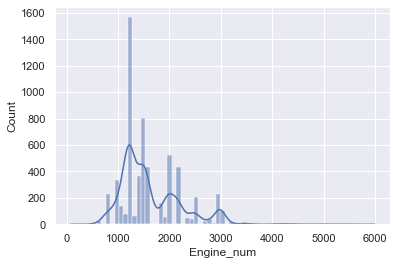

In [60]:
sns.histplot(cfu2["Engine_num"],kde=True)

<AxesSubplot:xlabel='Mileage_num', ylabel='Count'>

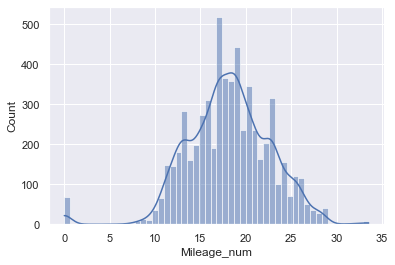

In [61]:
sns.histplot(cfu2["Mileage_num"],kde=True)

<AxesSubplot:xlabel='Power_num', ylabel='Count'>

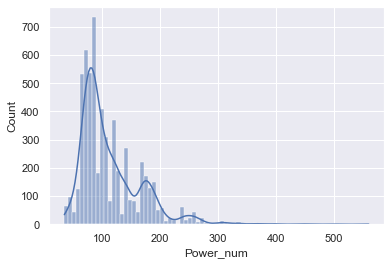

In [62]:
sns.histplot(cfu2["Power_num"],kde=True)

<AxesSubplot:xlabel='Power_num_log', ylabel='Count'>

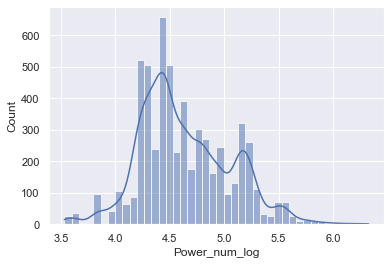

In [63]:
#look at distribution of log transoformation of power variable
cfu2['Power_num_log']=np.log(cfu2['Power_num'])
sns.histplot(cfu2["Power_num_log"],kde=True)

In [64]:
#keep the log transformation of power
cfu2.drop(["Power_num"], axis=1, inplace=True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Seats                   5977 non-null   float64
 1   Price                   6019 non-null   float64
 2   Make_Ambassador         6019 non-null   uint8  
 3   Make_Audi               6019 non-null   uint8  
 4   Make_BMW                6019 non-null   uint8  
 5   Make_Bentley            6019 non-null   uint8  
 6   Make_Chevrolet          6019 non-null   uint8  
 7   Make_Datsun             6019 non-null   uint8  
 8   Make_Fiat               6019 non-null   uint8  
 9   Make_Force              6019 non-null   uint8  
 10  Make_Ford               6019 non-null   uint8  
 11  Make_Honda              6019 non-null   uint8  
 12  Make_Hyundai            6019 non-null   uint8  
 13  Make_ISUZU              6019 non-null   uint8  
 14  Make_Isuzu              6019 non-null   

# SEATS

<AxesSubplot:xlabel='Seats', ylabel='Count'>

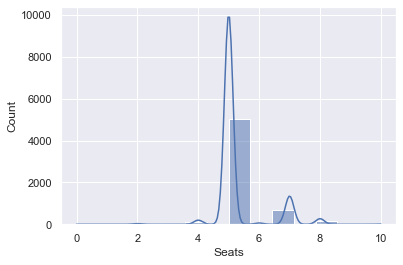

In [65]:
sns.histplot(cfu2["Seats"],kde=True)

In [66]:
#create category for seats (<5, =5, >5)
cfu2['Seats_lt5'] = (cfu2['Seats'] <5).astype(int)
cfu2['Seats_gt5'] = (cfu2['Seats'] >5).astype(int)
#source
#https://stackoverflow.com/questions/37164035/dummy-variables-in-pandas-based-on-values

In [67]:
cfu2.sample(20)

,Seats,Price,Make_Ambassador,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Location_Pune,Location_Chennai,Location_Coimbatore,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Delhi,Location_Bangalore,Location_Ahmedabad,Year_group,Kilometers_Driven_log,Fuel_Type_CNG,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Owner_Type_Num,Engine_num,Mileage_num,Power_num_log,Seats_lt5,Seats_gt5
4741,5.0,6.25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-1,11.002100,0,0,0,1,0,1,1497.0,17.40,4.764735,0,0
670,5.0,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1,10.809728,0,0,0,1,0,1,1373.0,20.73,4.511958,0,0
996,5.0,1.45,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-7,11.440355,0,0,0,1,0,1,1086.0,0.00,4.127134,0,0
2215,5.0,3.95,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-6,11.127263,0,0,0,0,0,2,1396.0,23.00,4.499810,0,0
2315,5.0,4.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,9.472705,0,0,0,1,0,1,1197.0,20.40,4.404277,0,0
507,7.0,4.25,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.126631,0,0,0,1,0,2,1497.0,17.30,4.764735,0,1
4808,5.0,4.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-3,11.460242,0,0,0,0,0,1,1248.0,22.90,4.304065,0,0
3386,5.0,5.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,10.968233,0,0,0,0,0,1,1461.0,19.64,4.686289,0,0
1765,5.0,2.90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-4,11.280136,0,0,0,0,0,1,1248.0,21.10,4.302713,0,0
1333,5.0,4.50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-3,11.580584,0,0,0,0,0,2,1396.0,21.27,4.485936,0,0


In [68]:
cfu2.drop(["Seats"], axis=1, inplace=True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   6019 non-null   float64
 1   Make_Ambassador         6019 non-null   uint8  
 2   Make_Audi               6019 non-null   uint8  
 3   Make_BMW                6019 non-null   uint8  
 4   Make_Bentley            6019 non-null   uint8  
 5   Make_Chevrolet          6019 non-null   uint8  
 6   Make_Datsun             6019 non-null   uint8  
 7   Make_Fiat               6019 non-null   uint8  
 8   Make_Force              6019 non-null   uint8  
 9   Make_Ford               6019 non-null   uint8  
 10  Make_Honda              6019 non-null   uint8  
 11  Make_Hyundai            6019 non-null   uint8  
 12  Make_ISUZU              6019 non-null   uint8  
 13  Make_Isuzu              6019 non-null   uint8  
 14  Make_Jaguar             6019 non-null   

# IMPUTE MISSINGS

In [69]:
cfu2['Engine_num'].fillna(cfu2['Engine_num'].mean(), inplace = True)
cfu2['Mileage_num'].fillna(cfu2['Mileage_num'].mean(), inplace = True)
cfu2['Power_num_log'].fillna(cfu2['Power_num_log'].mean(), inplace = True)
cfu2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 54 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price                   6019 non-null   float64
 1   Make_Ambassador         6019 non-null   uint8  
 2   Make_Audi               6019 non-null   uint8  
 3   Make_BMW                6019 non-null   uint8  
 4   Make_Bentley            6019 non-null   uint8  
 5   Make_Chevrolet          6019 non-null   uint8  
 6   Make_Datsun             6019 non-null   uint8  
 7   Make_Fiat               6019 non-null   uint8  
 8   Make_Force              6019 non-null   uint8  
 9   Make_Ford               6019 non-null   uint8  
 10  Make_Honda              6019 non-null   uint8  
 11  Make_Hyundai            6019 non-null   uint8  
 12  Make_ISUZU              6019 non-null   uint8  
 13  Make_Isuzu              6019 non-null   uint8  
 14  Make_Jaguar             6019 non-null   

# BIVARIATE ANALYSIS

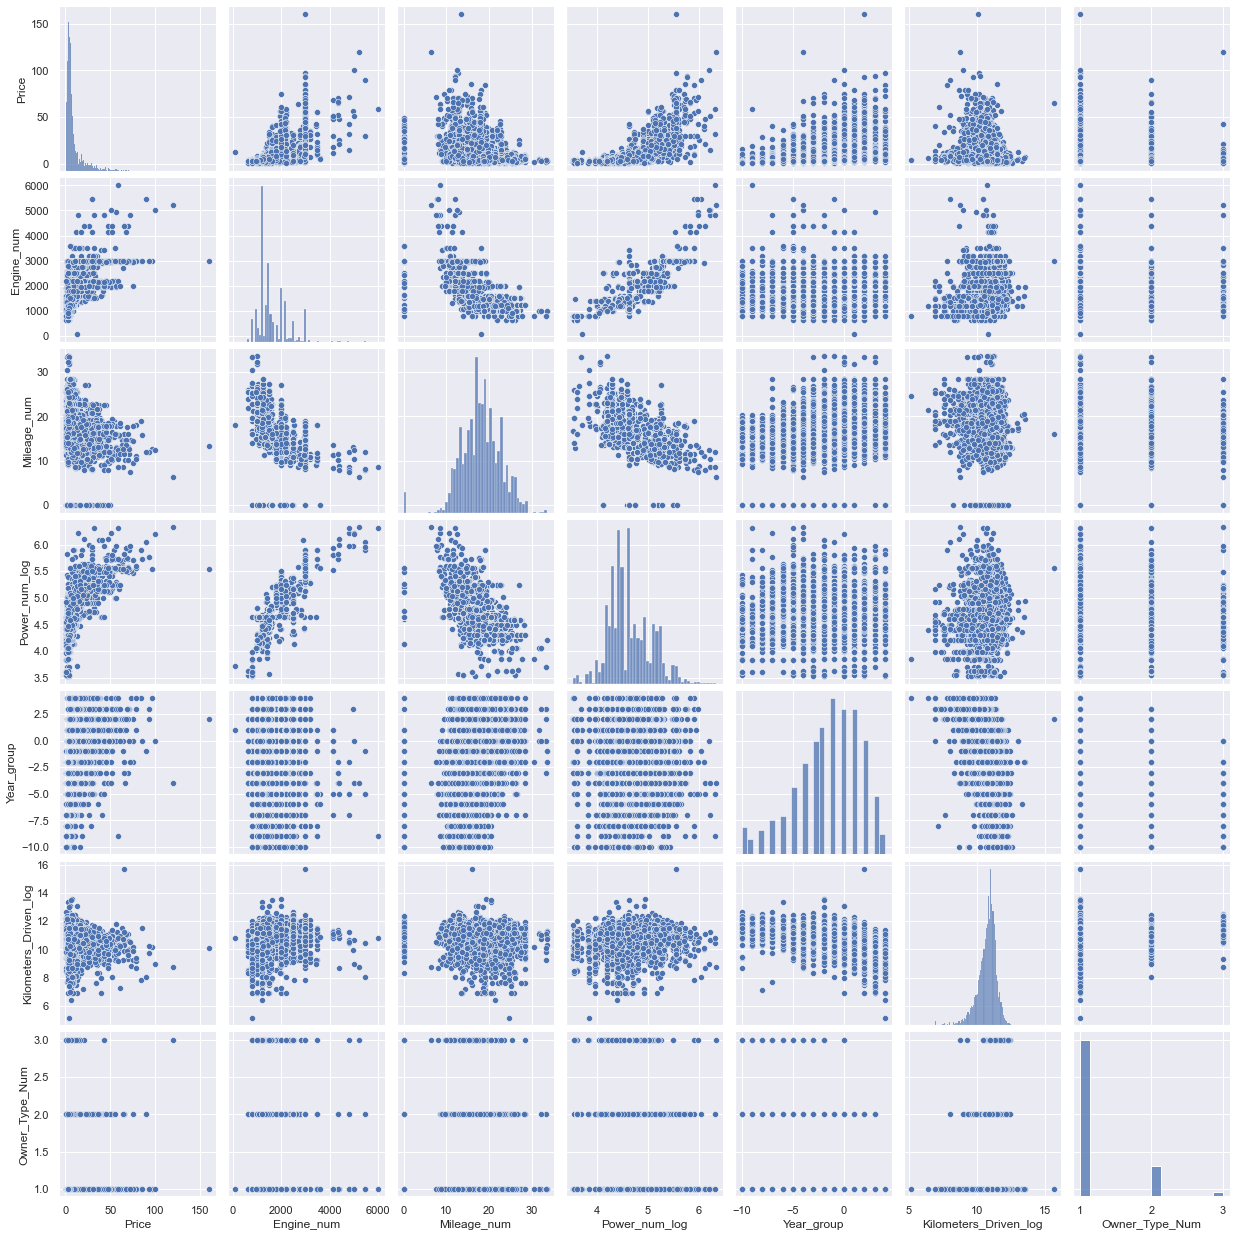

In [70]:
sns.pairplot(cfu2,
             x_vars=["Price","Engine_num","Mileage_num","Power_num_log","Year_group","Kilometers_Driven_log","Owner_Type_Num"]
             ,y_vars=["Price","Engine_num","Mileage_num","Power_num_log","Year_group","Kilometers_Driven_log","Owner_Type_Num"])

# Observations
Engine, mileage, power, year, and number of owners seem to have strong linear correlations with price.
Kilometers driven doesn't have an apparent linear relationship with price.
Pehaps there are variables that should be considered but are not avilable such as a history of damage on the vehicle. I would recommend that the company purchase this extra variable to add to this dataset.

# Prepare the x and y variables, train and test datasets

In [71]:
# lets build our linear model
# independant variables
X = cfu2.drop(['Price'], axis=1)
# the dependent variable
y = cfu2[['Price']]

In [72]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

# Fit the Linear Regression

In [73]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [74]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Make_Ambassador is 7.27212689613047
The coefficient for Make_Audi is 9.972064839128418
The coefficient for Make_BMW is 9.564212448064414
The coefficient for Make_Bentley is 18.529708033533208
The coefficient for Make_Chevrolet is -1.5152179965914683
The coefficient for Make_Datsun is -3.8958928297959536
The coefficient for Make_Fiat is -1.5142672193029778
The coefficient for Make_Force is -4.360211553718824
The coefficient for Make_Ford is -1.0345336983550995
The coefficient for Make_Honda is -1.877874301671356
The coefficient for Make_Hyundai is -0.9469536614519414
The coefficient for Make_ISUZU is -11.24532821049204
The coefficient for Make_Isuzu is 4.8760995241536875e-11
The coefficient for Make_Jaguar is 17.441831853055728
The coefficient for Make_Jeep is 0.8785935232407969
The coefficient for Make_Lamborghini is 78.38078626994651
The coefficient for Make_Land is 22.39629099015569
The coefficient for Make_Mahindra is -5.3463913110498416
The coefficient for Make_

In [75]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.361193367693124


In [76]:
#create new df with the linear regression results
coef_df = pd.DataFrame(
    np.append(regression_model.coef_, regression_model.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Make_Ambassador,7.272127e+00
Make_Audi,9.972065e+00
Make_BMW,9.564212e+00
Make_Bentley,1.852971e+01
Make_Chevrolet,-1.515218e+00
Make_Datsun,-3.895893e+00
Make_Fiat,-1.514267e+00
Make_Force,-4.360212e+00
Make_Ford,-1.034534e+00
Make_Honda,-1.877874e+00


# variable interpretation

> The intercept can be interpreted as a Maruti brand, sold in Mumbai, 
year of production 2015, diesel fuel, manual transmission, no previous owners,
engine CC of zero, with 5 seats.


> Some vehicle makes account for a lage increase in price, specifically the luxury brands (Bentley, Jauage, Lambourghini, Land Rover, Mercedes, Mini Cooper and Porsche). Brands that lead to a reduced price are Isuzu and Mahindra. 

> Selling a car in Coimbatore or  Hyderabad increases the price of the vehicle,
while selling a car in Kolkata slightly reduces the price.

> Increasing the number of owners, and amount of mileage decreases the value of the car

> Having fewer than 5 seats, such as a sports car increases the value of the vehicle

> Kilometers are log transformed, therefore the interpretation of these variables must be considered in relation to another value - the effect of a one-unit increase in KM for lower values does not lead to the same increase in price as a one-unit incrase in KM for higher values. Power must be interpreted the same way as it is also log transformed.

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faqhow-do-i-interpret-a-regression-model-when-some-variables-are-log-transformed/

In [77]:
#how much variation in output variable is accounted for put inputs (in sample)
regression_model.score(X_train, y_train)

0.7614264087110153

In [78]:
#out of sample score (R^2)

regression_model.score(X_test, y_test)

0.8187235388399989

In [79]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [80]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(regression_model, X_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,5.5232,3.051309,0.761426,0.758386


In [81]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(regression_model, X_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared
0,4.639758,2.81904,0.818724,0.81324


# Observations

The train and test  𝑅2  are 0.76 and 0.82, indicating that the model explains 76% and 82% of the total variation in the train and test sets respectively. Also, both scores are comparable. This is a good model, as it accounts for a fairly large portion of the variance. Perhaps if "history of damage" was added we could explain a bit more, but this varialbe would need to be purchased from a vendor.

RMSE values on the train and test sets are also comparable.

This shows that the model is not overfitting.

MAE indicates that our current model is able to predict anime ratings within a mean error of 3.

However, the overall performance is good.

> The company should use this model to determine when to buy cars (when current market is selling them at a lower price than what the model indicates) and when to sell cars (when current market is selling them at a higher price than what the model indicates). Model users should be cautious when using the model to assess cars that have extreme values (year prior to 2006, or more than 3 previous owners, for example, or a very high number of miles).

> The company should adjust their pricing of vehicles based upon the location of sale. I would recommend we buy cars in areas such as 
Kolkata and sell them in Coimbatore, Hyderabad, or Jaipur if we determine that the price of transporting the vehicles between these two locations is less than the amount we could gain from the increase in selling price.

> The demand for 2013-2017 cars seems to be the highest, as the majority of used cars falls in this range. I would have the company focus here as the supply might be large enough to allow for targeted approach to buying/selling when cars are listed below/above fair market price.

> Electric vehicles and luxury vehicles sell at an increased price but there is also lower availability of these vehicles. I would have the company focus on the area where there is a large supply of vehicles to take advantage of shifts in the market. For example, there seems to be ample supply of Maruti, Hyundai and Honda vehicles. It would be most likely the company could find mis-priced vehicles of this type and then can re-sell the vehicle at a higher cost in a different location.